# Alphalens: event study

While Alphalens is a tool designed to evaluate a cross-sectional signal which can be used to rank many securities each day, we can still make use of Alphalens returns analysis functions, a subset of Alphalens, to create a meaningful event study.

An event study is a statistical method to assess the impact of a particular event on the value of a stock. In this example we will evalute what happens to stocks whose price fall below 30$

In [1]:
%pylab inline --no-import-all
import alphalens
import pandas as pd
import numpy as np
import datetime

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
import warnings
warnings.filterwarnings('ignore')

Below is a simple mapping of tickers to sectors for a universe of 500 large cap stocks.

In [3]:
tickers = [ 'ACN', 'ATVI', 'ADBE', 'AMD', 'AKAM', 'ADS', 'GOOGL', 'GOOG', 'APH', 'ADI', 'ANSS', 'AAPL',
'AVGO', 'CA', 'CDNS', 'CSCO', 'CTXS', 'CTSH', 'GLW', 'CSRA', 'DXC', 'EBAY', 'EA', 'FFIV', 'FB',
'FLIR', 'IT', 'GPN', 'HRS', 'HPE', 'HPQ', 'INTC', 'IBM', 'INTU', 'JNPR', 'KLAC', 'LRCX', 'MA', 'MCHP',
'MSFT', 'MSI', 'NTAP', 'NFLX', 'NVDA', 'ORCL', 'PAYX', 'PYPL', 'QRVO', 'QCOM', 'RHT', 'CRM', 'STX',
'AMG', 'AFL', 'ALL', 'AXP', 'AIG', 'AMP', 'AON', 'AJG', 'AIZ', 'BAC', 'BK', 'BBT', 'BRK.B', 'BLK', 'HRB',
'BHF', 'COF', 'CBOE', 'SCHW', 'CB', 'CINF', 'C', 'CFG', 'CME', 'CMA', 'DFS', 'ETFC', 'RE', 'FITB', 'BEN',
'GS', 'HIG', 'HBAN', 'ICE', 'IVZ', 'JPM', 'KEY', 'LUK', 'LNC', 'L', 'MTB', 'MMC', 'MET', 'MCO', 'MS',
'NDAQ', 'NAVI', 'NTRS', 'PBCT', 'PNC', 'PFG', 'PGR', 'PRU', 'RJF', 'RF', 'SPGI', 'STT', 'STI', 'SYF', 'TROW',
'ABT', 'ABBV', 'AET', 'A', 'ALXN', 'ALGN', 'AGN', 'ABC', 'AMGN', 'ANTM', 'BCR', 'BAX', 'BDX', 'BIIB', 'BSX',
'BMY', 'CAH', 'CELG', 'CNC', 'CERN', 'CI', 'COO', 'DHR', 'DVA', 'XRAY', 'EW', 'EVHC', 'ESRX', 'GILD', 'HCA',
'HSIC', 'HOLX', 'HUM', 'IDXX', 'ILMN', 'INCY', 'ISRG', 'IQV', 'JNJ', 'LH', 'LLY', 'MCK', 'MDT', 'MRK', 'MTD',
'MYL', 'PDCO', 'PKI', 'PRGO', 'PFE', 'DGX', 'REGN', 'RMD', 'SYK', 'TMO', 'UNH', 'UHS', 'VAR', 'VRTX', 'WAT',
'MMM', 'AYI', 'ALK', 'ALLE', 'AAL', 'AME', 'AOS', 'ARNC', 'BA', 'CHRW', 'CAT', 'CTAS', 'CSX', 'CMI', 'DE',
'DAL', 'DOV', 'ETN', 'EMR', 'EFX', 'EXPD', 'FAST', 'FDX', 'FLS', 'FLR', 'FTV', 'FBHS', 'GD', 'GE', 'GWW',
'HON', 'INFO', 'ITW', 'IR', 'JEC', 'JBHT', 'JCI', 'KSU', 'LLL', 'LMT', 'MAS', 'NLSN', 'NSC', 'NOC', 'PCAR',
'PH', 'PNR', 'PWR', 'RTN', 'RSG', 'RHI', 'ROK', 'COL', 'ROP', 'LUV', 'SRCL', 'TXT', 'TDG', 'UNP', 'UAL',
'AES', 'LNT', 'AEE', 'AEP', 'AWK', 'CNP', 'CMS', 'ED', 'D', 'DTE', 'DUK', 'EIX', 'ETR', 'ES', 'EXC']

Load the prices.

In [4]:
import yfinance as yf
start_date = datetime.datetime(2015, 6, 1)
end_date = datetime.datetime(2017, 1, 1)

# Fetch data using yfinance
pan = yf.download(tickers, start=start_date, end=end_date)

[*********************100%***********************]  247 of 247 completed

35 Failed downloads:
['FB', 'KSU', 'PKI', 'NLSN', 'ATVI', 'FBHS', 'VAR', 'ETFC', 'ADS', 'AGN', 'RE', 'BBT', 'ARNC', 'FLIR', 'BRK.B', 'MYL', 'ALXN', 'RHT', 'LLL', 'RTN', 'CTXS', 'ANTM', 'JEC', 'HRS', 'PBCT', 'CERN', 'ABC', 'CELG']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')
['BCR', 'LUK']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (1d 2015-06-01 00:00:00 -> 2017-01-01 00:00:00)')
['STI', 'BHF', 'INFO', 'IR', 'CA']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (1d 2015-06-01 00:00:00 -> 2017-01-01 00:00:00) (Yahoo error = "Data doesn\'t exist for startDate = 1433131200, endDate = 1483246800")')


Now it's time to build the events DataFrame, the input will give to Alphalens.

Alphalens calculates statistics for those dates where the input DataFrame has values (not NaN). So to compute the performace analysis on specific dates and securities (like an event study) then we have to make sure the input DataFrame contains valid values only on those date/security combinations where the event happens. All the other values in the DataFrame must be NaN or not present.

Also, make sure the event values are positive (it doesn't matter the value but they must be positive) if you intend to go long on the events and use negative values if you intent to go short. This impacts the cumulative returns plots. 

Let's create the event DataFrame where we "mark" (any value) each day a security price fall below 30$. 

In [5]:
start_date = datetime.datetime(2015, 6, 1)
end_date = datetime.datetime(2017, 1, 1)

# Fetch data using yfinance
pan = yf.download(tickers, start=start_date, end=end_date)

# Extract the 'Open' prices for each ticker
today_price = pan['Open']

# Shift the 'Open' prices to get yesterday's prices
yesterday_price = today_price.shift(1)

# Identify events where today's price is below 30 and yesterday's price was above or equal to 30
events = today_price[(today_price < 30.0) & (yesterday_price >= 30)]

# Stack the DataFrame to have a multi-index with 'date' and 'asset'
events = events.stack()

# Set the index names to 'date' and 'asset'
events.index = events.index.set_names(['date', 'asset'])

# Convert the values to float (if necessary)
events = events.astype(float)

# Display the events
print(events)

[*********************100%***********************]  247 of 247 completed

35 Failed downloads:
['FB', 'KSU', 'PKI', 'NLSN', 'ATVI', 'FBHS', 'VAR', 'ETFC', 'ADS', 'AGN', 'BBT', 'ARNC', 'RE', 'MYL', 'BRK.B', 'FLIR', 'RHT', 'ALXN', 'LLL', 'RTN', 'CTXS', 'ANTM', 'JEC', 'HRS', 'CERN', 'ABC', 'CELG', 'PBCT']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')
['BCR', 'LUK']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (1d 2015-06-01 00:00:00 -> 2017-01-01 00:00:00)')
['STI', 'BHF', 'INFO', 'IR', 'CA']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (1d 2015-06-01 00:00:00 -> 2017-01-01 00:00:00) (Yahoo error = "Data doesn\'t exist for startDate = 1433131200, endDate = 1483246800")')


date                       asset
2015-06-04 00:00:00+00:00  LNT      29.645000
                           PWR      29.850000
2015-06-18 00:00:00+00:00  PWR      29.870001
2015-06-25 00:00:00+00:00  PWR      29.629999
2015-06-30 00:00:00+00:00  HRB      29.730000
                                      ...    
2016-12-09 00:00:00+00:00  CSCO     29.980000
2016-12-13 00:00:00+00:00  EW       29.476667
2016-12-14 00:00:00+00:00  EBAY     29.850000
2016-12-21 00:00:00+00:00  CTAS     29.992500
2016-12-23 00:00:00+00:00  CTAS     29.270000
Length: 134, dtype: float64


The pricing data passed to alphalens should contain the entry price for the assets so it must reflect the next available price after an event was observed at a given timestamp. Those prices must not be used in the calculation of the events for that time. Always double check to ensure you are not introducing lookahead bias to your study.

The pricing data must also contain the exit price for the assets, for period 1 the price at the next timestamp will be used, for period 2 the price after 2 timestats will be used and so on.

While Alphalens is time frequency agnostic, in our example we build 'pricing' DataFrame so that for each event timestamp it contains the assets open price for the next day afer the event is detected, this price will be used as the assets entry price. Also, we are not adding additional prices so the assets exit price will be the following days open prices (how many days depends on 'periods' argument).

In [6]:
pricing = pan['Open'].iloc[1:]

# Run Event Style Returns Analysis

Before running Alphalens beware of some important options: 

In [7]:
# we don't want any filtering to be done

filter_zscore = None 

In [8]:
# We want to have only one  bin/quantile. So we can either use quantiles=1 or bins=1

quantiles = None
bins      = 1

# Beware that in pandas versions below 0.20.0 there were few bugs in panda.qcut and pandas.cut
# that resulted in ValueError exception to be thrown when identical values were present in the
# dataframe and 1 quantile/bin was selected.
# As a workaroung use the bins custom range option that include all your values. E.g.

quantiles = None
bins      = [-1000000,1000000]

In [9]:
# You don't have to directly set 'long_short' option when running alphalens.tears.create_event_study_tear_sheet
# But in case you are making use of other Alphalens functions make sure to set 'long_short=False'
# if you set 'long_short=True' Alphalens will perform forward return demeaning and that makes sense only
# in a dollar neutral portfolio. With an event style signal you cannot usually create a dollar neutral
# long/short portfolio

long_short = False

In [10]:
factor_data = alphalens.utils.get_clean_factor_and_forward_returns(events, 
                                                                   pricing, 
                                                                   quantiles=None,
                                                                   bins=1,
                                                                   periods=(1, 2, 3, 4, 5, 6, 10),
                                                                   filter_zscore=None)

Dropped 1.5% entries from factor data: 1.5% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 35.0%, not exceeded: OK!


factor_data =                                         1D        2D        3D        4D  \
date                      asset                                           
2015-06-04 00:00:00+00:00 LNT   -0.010794 -0.017541 -0.021926 -0.018384   
                          PWR   -0.025126 -0.015745 -0.031491 -0.023116   
2015-06-18 00:00:00+00:00 PWR   -0.004352  0.006026  0.018413  0.012052   
2015-06-25 00:00:00+00:00 PWR   -0.014175 -0.009450 -0.018900 -0.020250   
2015-06-30 00:00:00+00:00 HRB    0.005718  0.001345 -0.011436  0.005382   
...                                   ...       ...       ...       ...   
2016-12-02 00:00:00+00:00 PFE    0.006341  0.003488 -0.006658 -0.022194   
2016-12-07 00:00:00+00:00 PFE   -0.015640 -0.007022  0.011810  0.047239   
2016-12-09 00:00:00+00:00 CSCO   0.003336  0.010674  0.020680  0.020347   
2016-12-13 00:00:00+00:00 EW     0.014927  0.015040  0.032003  0.032568   
2016-12-14 00:00:00+00:00 EBAY   0.000670 -0.004020 -0.005025 -0.010720   

         

,min,max,mean,std,count,count %
factor_quantile,,,,,,
1.0,26.549999,29.99,29.529339,0.561672,132,100.0


<Figure size 640x480 with 0 Axes>

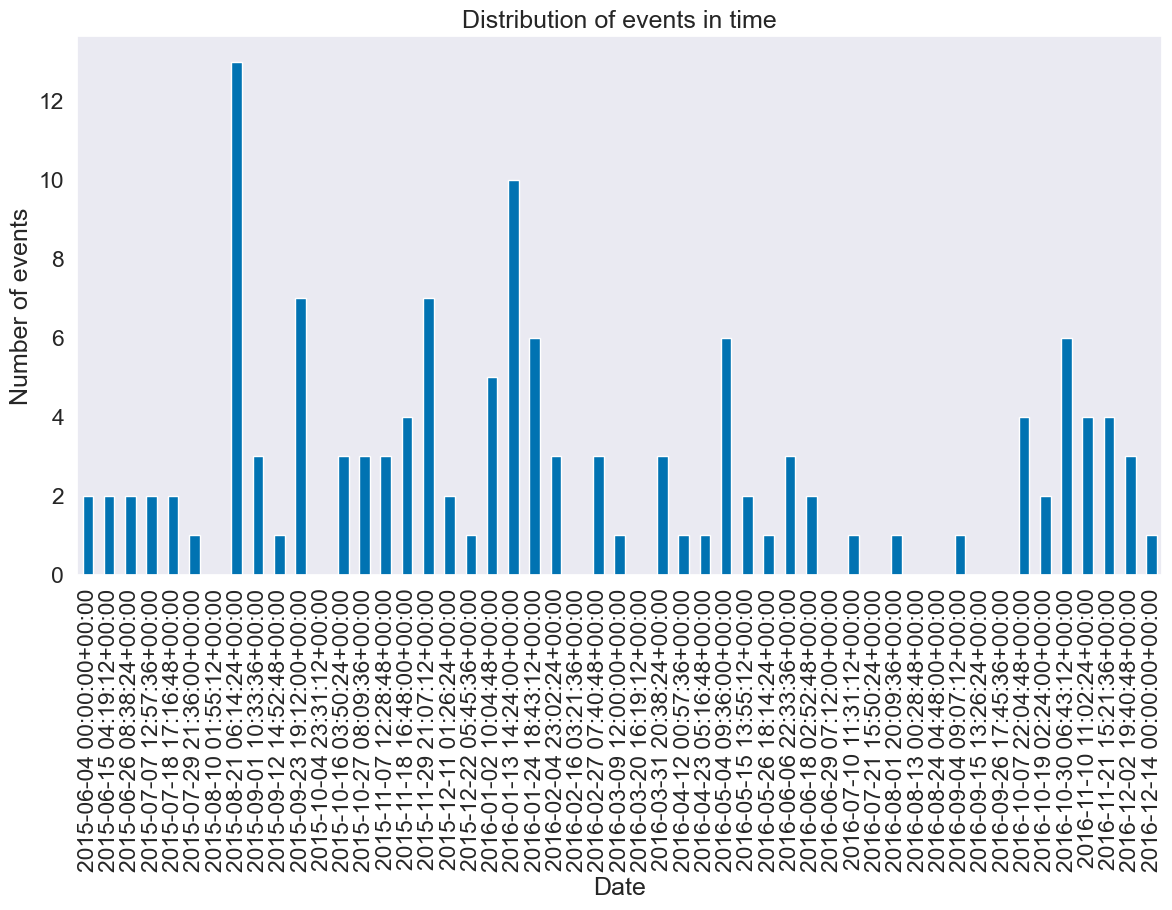

series =  Ticker        LNT        PWR
-2      30.545000  29.469999
-1      30.225000  30.000000
0       29.645000  29.850000
1       29.325001  29.100000
2       29.125000  29.379999
3       28.995001  28.910000
4       29.100000  29.160000
5       29.209999  29.350000
6       29.225000  29.379999
7       29.030001  29.570000
8       28.865000  29.440001
9       29.150000  30.049999
10      29.365000  29.870001
series =  Ticker        PWR
-5      29.350000
-4      29.379999
-3      29.570000
-2      29.440001
-1      30.049999
0       29.870001
1       29.740000
2       30.049999
3       30.420000
4       30.230000
5       29.629999
6       29.209999
7       29.350000
8       29.070000
9       29.030001
10      28.830000
series =  Ticker        PWR
-5      29.870001
-4      29.740000
-3      30.049999
-2      30.420000
-1      30.230000
0       29.629999
1       29.209999
2       29.350000
3       29.070000
4       29.030001
5       28.830000
6       28.160000
7       28.299999
8     

<Figure size 640x480 with 0 Axes>

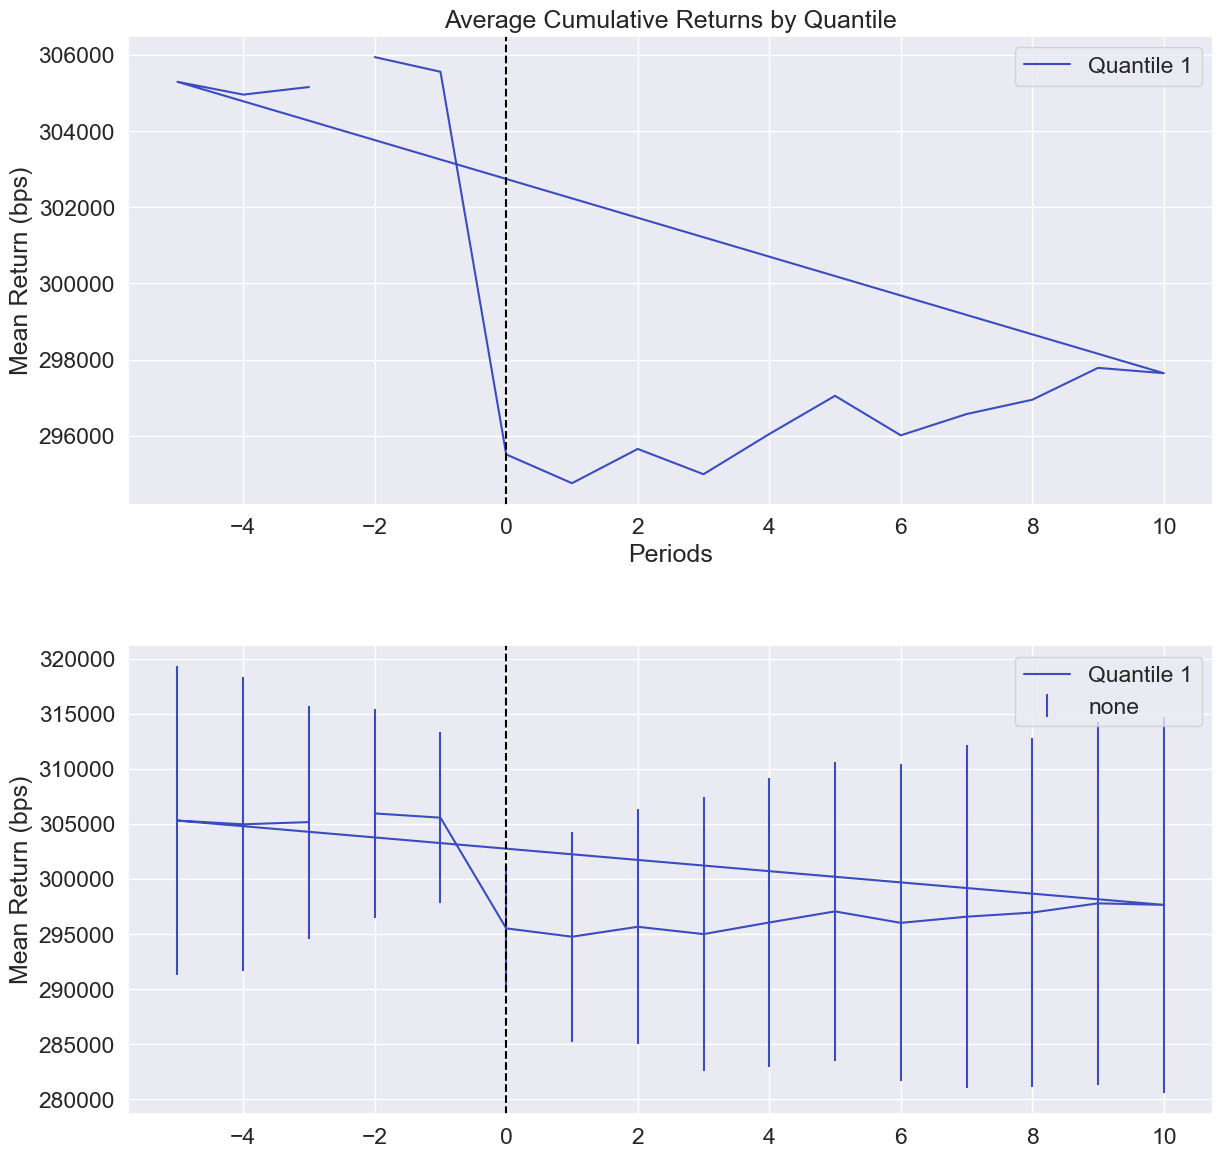

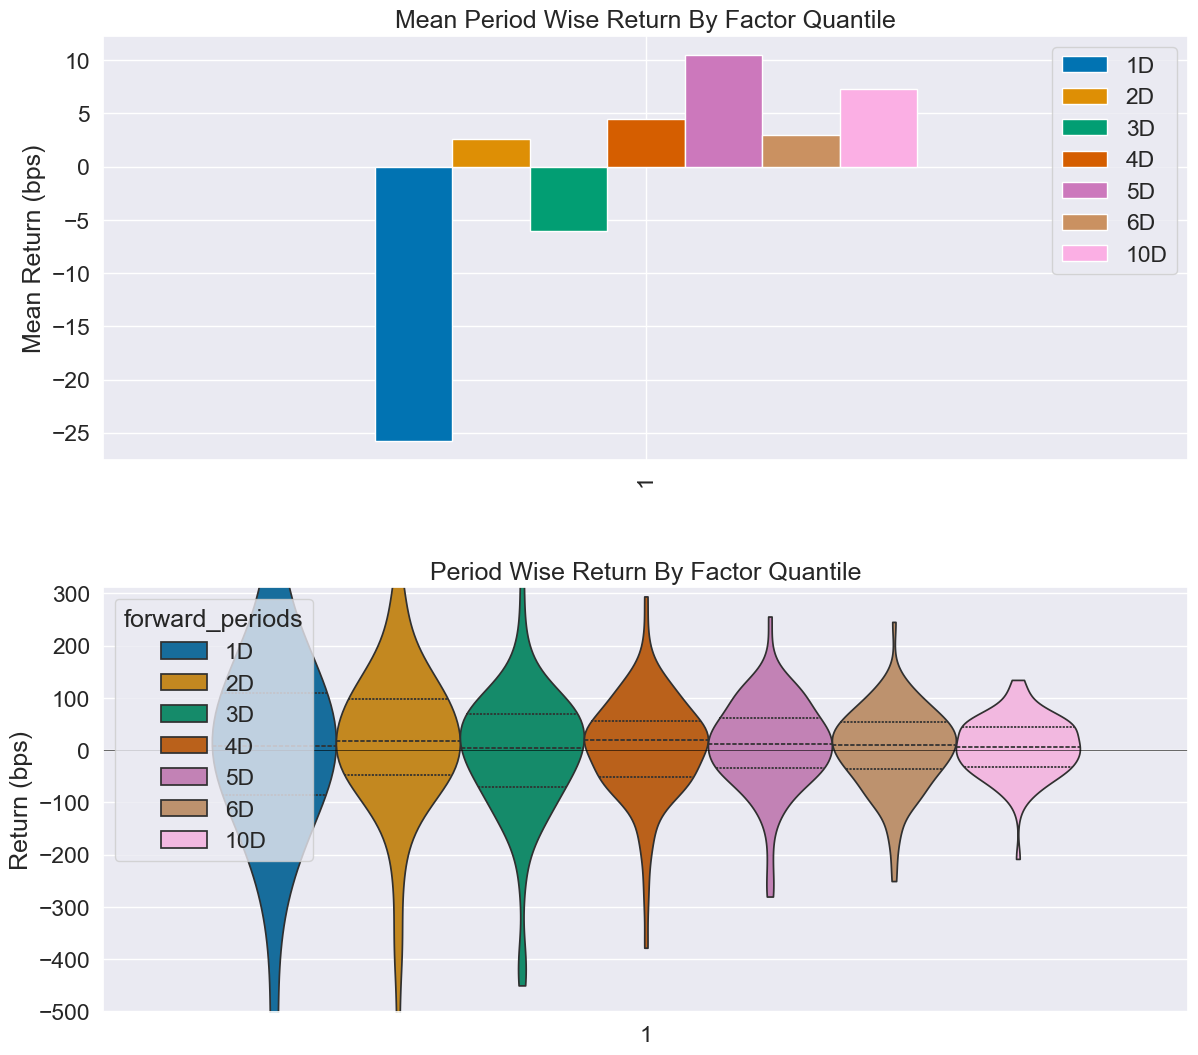

In [11]:
alphalens.tears.create_event_study_tear_sheet(factor_data, pricing, avgretplot=(5, 10))


### If we wanted to analyze the performance of  short signal, we only had to switch from positive to negative event values

In [12]:
events = -events

In [13]:
factor_data = alphalens.utils.get_clean_factor_and_forward_returns(events, 
                                                                   pricing, 
                                                                   quantiles=None,
                                                                   bins=1,
                                                                   periods=(1, 2, 3, 4, 5, 6, 10),
                                                                   filter_zscore=None)

Dropped 1.5% entries from factor data: 1.5% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 35.0%, not exceeded: OK!


factor_data =                                         1D        2D        3D        4D  \
date                      asset                                           
2015-06-04 00:00:00+00:00 LNT   -0.010794 -0.017541 -0.021926 -0.018384   
                          PWR   -0.025126 -0.015745 -0.031491 -0.023116   
2015-06-18 00:00:00+00:00 PWR   -0.004352  0.006026  0.018413  0.012052   
2015-06-25 00:00:00+00:00 PWR   -0.014175 -0.009450 -0.018900 -0.020250   
2015-06-30 00:00:00+00:00 HRB    0.005718  0.001345 -0.011436  0.005382   
...                                   ...       ...       ...       ...   
2016-12-02 00:00:00+00:00 PFE    0.006341  0.003488 -0.006658 -0.022194   
2016-12-07 00:00:00+00:00 PFE   -0.015640 -0.007022  0.011810  0.047239   
2016-12-09 00:00:00+00:00 CSCO   0.003336  0.010674  0.020680  0.020347   
2016-12-13 00:00:00+00:00 EW     0.014927  0.015040  0.032003  0.032568   
2016-12-14 00:00:00+00:00 EBAY   0.000670 -0.004020 -0.005025 -0.010720   

         

,min,max,mean,std,count,count %
factor_quantile,,,,,,
1.0,-29.99,-26.549999,-29.529339,0.561672,132,100.0


<Figure size 640x480 with 0 Axes>

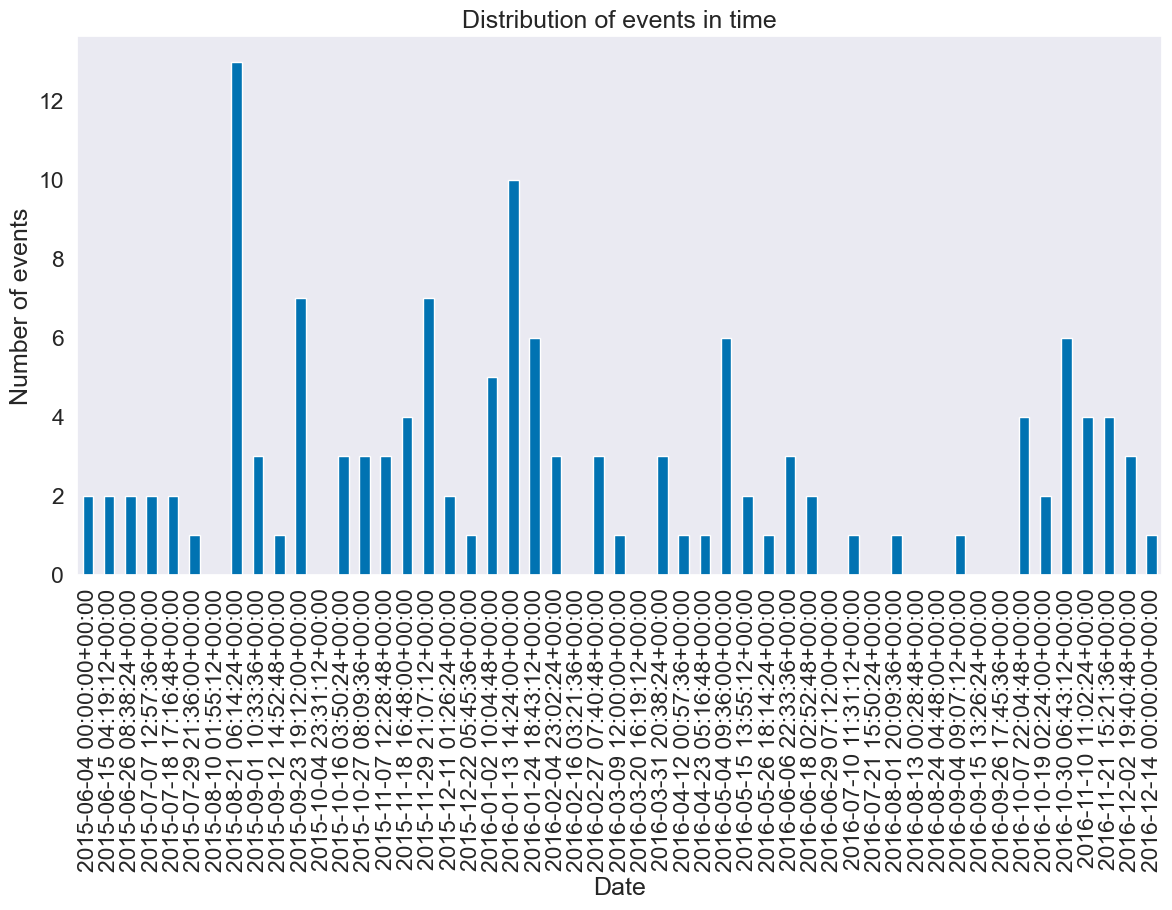

series =  Ticker        LNT        PWR
-2      30.545000  29.469999
-1      30.225000  30.000000
0       29.645000  29.850000
1       29.325001  29.100000
2       29.125000  29.379999
3       28.995001  28.910000
4       29.100000  29.160000
5       29.209999  29.350000
6       29.225000  29.379999
7       29.030001  29.570000
8       28.865000  29.440001
9       29.150000  30.049999
10      29.365000  29.870001
series =  Ticker        PWR
-5      29.350000
-4      29.379999
-3      29.570000
-2      29.440001
-1      30.049999
0       29.870001
1       29.740000
2       30.049999
3       30.420000
4       30.230000
5       29.629999
6       29.209999
7       29.350000
8       29.070000
9       29.030001
10      28.830000
series =  Ticker        PWR
-5      29.870001
-4      29.740000
-3      30.049999
-2      30.420000
-1      30.230000
0       29.629999
1       29.209999
2       29.350000
3       29.070000
4       29.030001
5       28.830000
6       28.160000
7       28.299999
8     

<Figure size 640x480 with 0 Axes>

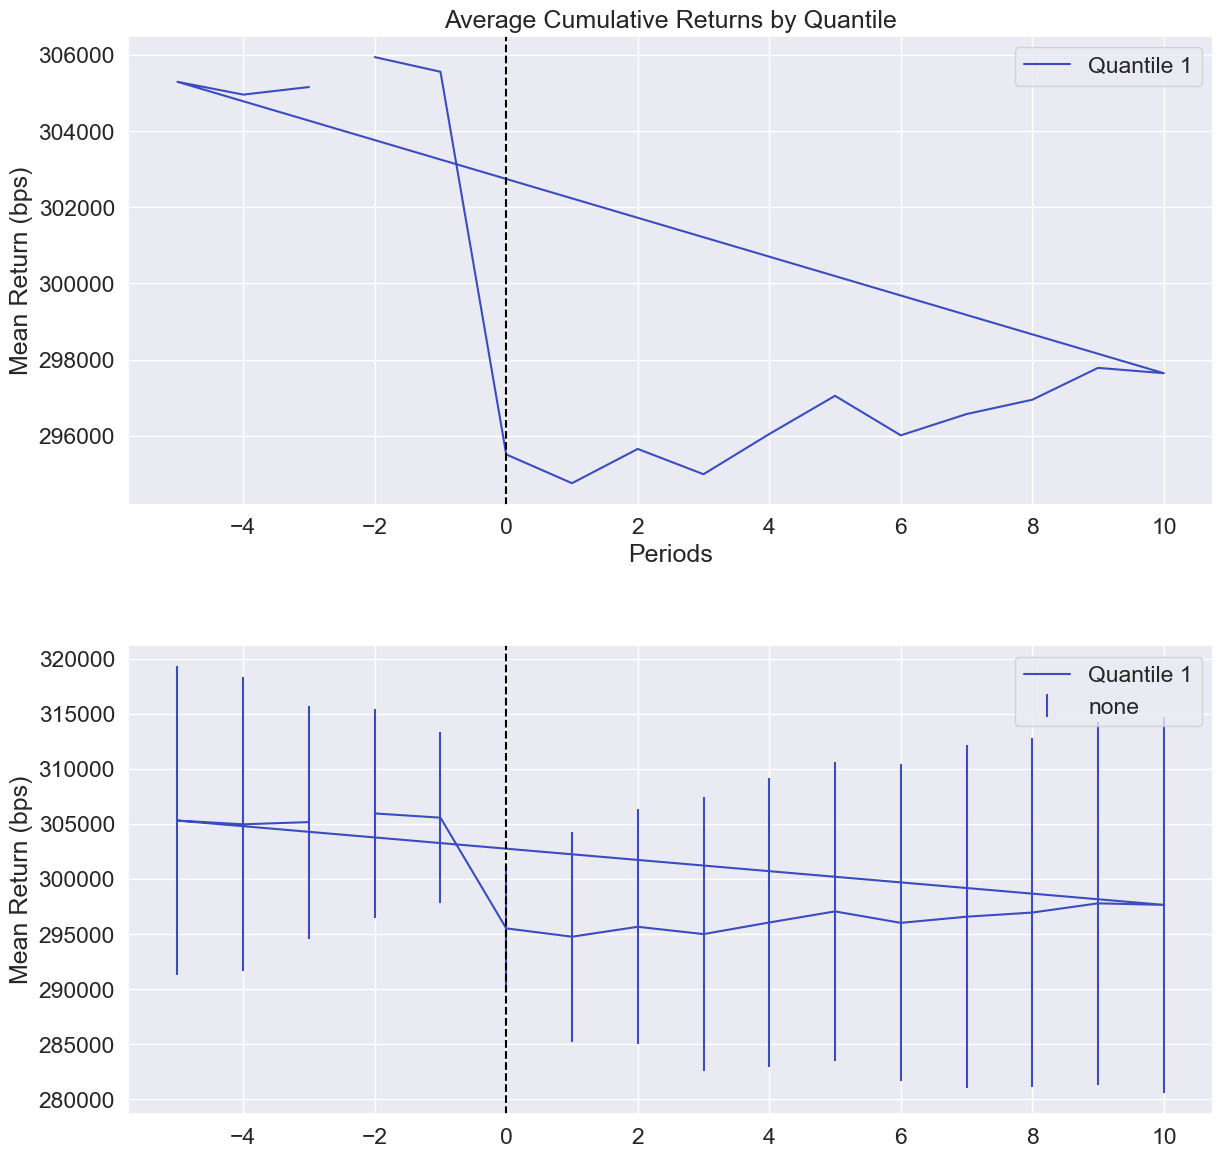

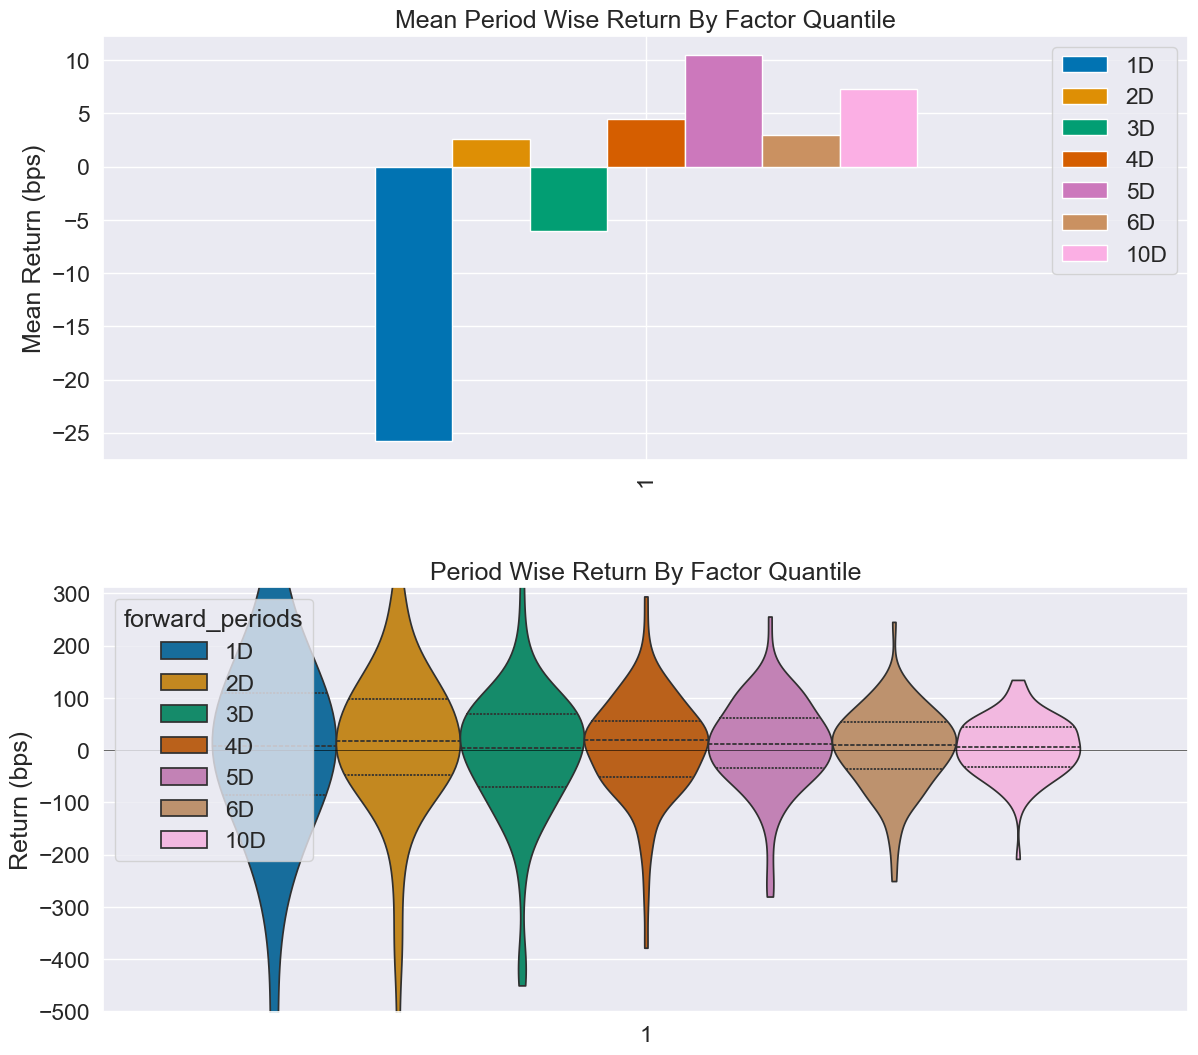

In [14]:
alphalens.tears.create_event_study_tear_sheet(factor_data, pricing, avgretplot=(5, 10))